In [1]:
import numpy as np                                     # To import numpy

In [2]:
import pandas as pd                                    # To import pandas

In [3]:
#This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. 
#It contains 76 attributes, including the predicted attribute, 
#but all published experiments refer to using a subset of 14 of them. 
#The "target" field refers to the presence of heart disease in the patient. 
#It is integer valued 0 = disease and 1 = no disease.
#1-Male,0-female

In [4]:
#age
#sex:1-Male,0-Female
#chest pain type (4 values:0,1,2,3),0-no pain,1-little pain,2-severe pain,3-pain which is not related to exercise.
#resting blood pressure-normal:less than 120
#serum cholestoral in mg/dl-normal:less than 200
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0-normal,1,2)
#maximum heart rate achieved(normal:60-100)
#exercise induced angina:
#0: No exercise-induced angina (the patient did not experience angina during the exercise stress test).
#1: Exercise-induced angina (the patient experienced angina during the exercise stress test).
#oldpeak = ST depression induced by exercise relative to rest-higher ST segment-higher old peak
#slope:1-upsloping(insufficient blood supply to the heart muscle),2-flat(no significant upward or downward slope),3-downsloping(a lack of blood flow to the heart muscle)
#ca:0,1,2,3:
#ca = 0: This indicates that there is no significant narrowing or stenosis in any of the major coronary arteries.
#ca = 1: It represents that one major coronary artery has significant narrowing or stenosis.
#ca = 2: This value signifies that two major coronary arteries are affected.
#ca = 3: It means that three major coronary arteries have significant stenosis or narrowing.
#thal(thallium stress test:to evaluate blood flow): 1 = normal; 2 = fixed defect; 3 = reversable defect


In [5]:
a=pd.read_csv("heart.csv")                           # To load data
a


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
a.drop_duplicates(inplace=True)    
a                                                                           # To remove duplicate values from original data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [79]:
a.info()                                                       # To get information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [8]:
a.describe()                                                     # To describe set(like max,min,mean,count.....)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
a.shape                                                               # To find number of rows and columns.

(302, 14)

In [10]:
a.count()                                                             #To count the number of each columns and rows

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

In [11]:
a.isnull().sum()                                                                         # shows that there are no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
a.isnull().sum().sum()                                                               #Shows the total number of null positions

0

In [7]:
import matplotlib                                                                    # To import matplotlib

In [8]:
import matplotlib.pyplot as plt                                                      # To import matplotlib as plt

In [9]:
import seaborn                                                                       # To import seaborn

In [10]:
import seaborn as sns                                                                # To import seaborn as sns

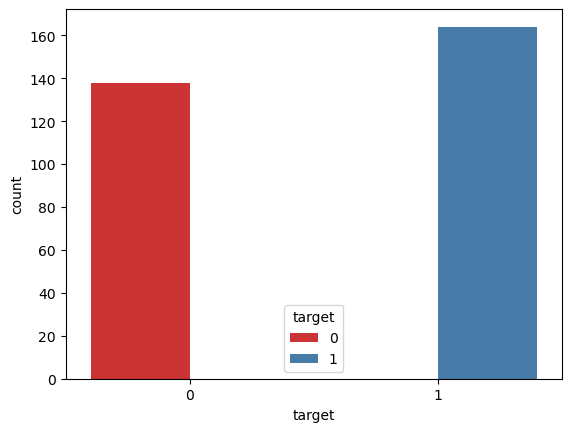

In [17]:
sns.countplot(x="target",hue="target",data=a,palette="Set1")           # number of persons affected with disease is less
plt.show()

In [18]:
# disease

In [22]:
demo=a.loc[:,"target"]==0              #(0)                           #To load only datas of 'target', equal to 0 
demo

0       True
1       True
2       True
3       True
4       True
       ...  
723    False
733    False
739     True
843     True
878     True
Name: target, Length: 302, dtype: bool

In [23]:
unhealthy=a[demo]                                          # To display all the rows and columns of 'unhealthy' people.
unhealthy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
720,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [24]:
unhealthybp=unhealthy.loc[0:878,"trestbps"]                         # To get 'trestbps' values of 'unhealthy people' 
unhealthybp

0      125
1      140
2      145
3      148
4      138
      ... 
694    118
720    140
739    128
843    160
878    120
Name: trestbps, Length: 138, dtype: int64

In [30]:
unhealthybpmean=unhealthybp.mean()               # To get mean of the above condition
unhealthybpmean

134.3985507246377

In [31]:
unhealthychol=unhealthy.loc[0:878,"chol"]                     # To get 'chol' values of unhealthy people  
unhealthychol

0      212
1      203
2      174
3      203
4      294
      ... 
694    219
720    335
739    255
843    273
878    188
Name: chol, Length: 138, dtype: int64

In [32]:
unhealthycholmean=unhealthychol.mean()       # To get mean of 'chol'
unhealthycholmean

251.08695652173913

In [33]:
unhealthyecg=unhealthy.loc[0:878,"restecg"]                # To get 'ecg' values of unhealthy people            
unhealthyecg

0      1
1      0
2      1
3      1
4      1
      ..
694    1
720    1
739    1
843    0
878    1
Name: restecg, Length: 138, dtype: int64

In [34]:
unhealthyecgmean=unhealthyecg.mean()             # To get mean of 'ecg'
unhealthyecgmean

0.4492753623188406

In [35]:
unhealthybs=unhealthy.loc[0:878,"fbs"]                # To get 'fbs' values of unhealthy people          
unhealthybs

0      0
1      1
2      0
3      0
4      1
      ..
694    0
720    0
739    0
843    0
878    0
Name: fbs, Length: 138, dtype: int64

In [36]:
unhealthybsmean=unhealthybs.mean()      # To get mean of 'fbs'
unhealthybsmean

0.15942028985507245

In [37]:
unhealthyhr=unhealthy.loc[0:878,"thalach"]                       # To get 'thalach' of unhealthy people  
unhealthyhr

0      168
1      155
2      125
3      161
4      106
      ... 
694    140
720    158
739    161
843    125
878    113
Name: thalach, Length: 138, dtype: int64

In [38]:
unhealthyhrmean=unhealthyhr.mean()                   # To get mean of thalach
unhealthyhrmean

139.1014492753623

In [39]:
unhealthycp=unhealthy.loc[0:878,"cp"]                         # To get 'cp' values of unhealthy people
unhealthycp

0      0
1      0
2      0
3      0
4      0
      ..
694    0
720    2
739    0
843    3
878    0
Name: cp, Length: 138, dtype: int64

In [40]:
unhealthycpmean=unhealthycp.mean()              # To get mean of 'cp'
unhealthycpmean

0.4782608695652174

In [41]:
unhealthysex=unhealthy.loc[0:878,"sex"]                       # To get 'sex' of unhealthy  
unhealthysex

0      1
1      1
2      1
3      1
4      0
      ..
694    1
720    1
739    1
843    1
878    1
Name: sex, Length: 138, dtype: int64

In [43]:
unhealthyexang=unhealthy.loc[0:878,"exang"]                          # To get 'exang' of unhealthy
unhealthyexang

0      0
1      1
2      1
3      0
4      0
      ..
694    0
720    0
739    1
843    0
878    0
Name: exang, Length: 138, dtype: int64

In [44]:
unhealthyexangmean=unhealthyexang.mean()                   # To get mean of 'exang'
unhealthyexangmean

0.5507246376811594

In [45]:
unhealthyop=unhealthy.loc[0:878,"oldpeak"]                          # To get 'oldpeak' of unhealthy
unhealthyop

0      1.0
1      3.1
2      2.6
3      0.0
4      1.9
      ... 
694    1.2
720    0.0
739    0.0
843    0.0
878    1.4
Name: oldpeak, Length: 138, dtype: float64

In [46]:
unhealthyopmean=unhealthyop.mean()                   # To get mean of 'oldpeak'
unhealthyopmean

1.5855072463768116

In [47]:
unhealthyslope=unhealthy.loc[0:878,"slope"]                         # To get slope of unhealthy
unhealthyslope

0      2
1      0
2      0
3      2
4      1
      ..
694    1
720    2
739    2
843    2
878    1
Name: slope, Length: 138, dtype: int64

In [48]:
unhealthyslopemean=unhealthyslope.mean()                                 # To get mean of 'slope'
unhealthyslopemean

1.1666666666666667

In [49]:
unhealthyca=unhealthy.loc[0:878,"ca"]                         # To get 'ca' of unhealthy
unhealthyca

0      2
1      0
2      0
3      1
4      3
      ..
694    0
720    0
739    1
843    0
878    1
Name: ca, Length: 138, dtype: int64

In [50]:
unhealthycamean=unhealthyca.mean()                              # mean of 'ca'
unhealthycamean

1.1666666666666667

In [51]:
unhealthythal=unhealthy.loc[0:878,"thal"]                         # 'thal' of unhealthy
unhealthythal

0      3
1      3
2      3
3      3
4      2
      ..
694    3
720    2
739    3
843    2
878    3
Name: thal, Length: 138, dtype: int64

In [52]:
unhealthythalmean=unhealthythal.mean()                            # mean of 'thal'
unhealthythalmean

2.5434782608695654

In [53]:
# no disease

In [54]:
demo=a.loc[:,"target"]==1             #(1)                           #To load only datas of 'target', equal to 1
demo

0      False
1      False
2      False
3      False
4      False
       ...  
723     True
733     True
739    False
843    False
878    False
Name: target, Length: 302, dtype: bool

In [55]:
healthy=a[demo]                                              # To display all rows and columns of healthy people(target=1)
healthy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [56]:
healthybp=healthy.loc[0:878,"trestbps"]                          # 'trestbps' of healthy
healthybp

5      100
10     112
12     118
16     140
18     120
      ... 
691    135
708    120
719    108
723    120
733    108
Name: trestbps, Length: 164, dtype: int64

In [57]:
healthybpmean=healthybp.mean()                                           # mean of 'trestbps'
healthybpmean

129.25

In [59]:
healthychol=healthy.loc[0:878,"chol"]                             # 'chol' of healthy
healthychol

5      248
10     149
12     210
16     308
18     244
      ... 
691    250
708    178
719    233
723    211
733    141
Name: chol, Length: 164, dtype: int64

In [50]:
healthycholmean=healthychol.mean()                             # mean of 'chol'
healthycholmean

240.23076923076923

In [60]:
healthybs=healthy.loc[0:878,"fbs"]                          # 'fbs' of healthy
healthybs

5      0
10     0
12     0
16     0
18     0
      ..
691    0
708    1
719    1
723    0
733    0
Name: fbs, Length: 164, dtype: int64

In [61]:
healthybsmean=healthybs.mean()                               # mean of 'fbs'
healthybsmean

0.1402439024390244

In [63]:
healthyecg=healthy.loc[0:878,"restecg"]                   # 'ecg' of healthy       
healthyecg

5      0
10     1
12     1
16     0
18     1
      ..
691    0
708    1
719    1
723    0
733    1
Name: restecg, Length: 164, dtype: int64

In [64]:
healthyecgmean=healthyecg.mean()                  # mean of 'ecg'
healthyecgmean

0.5914634146341463

In [66]:
healthyhr=healthy.loc[0:878,"thalach"]                          # 'thalach' of healthy
healthyhr

5      122
10     125
12     192
16     142
18     162
      ... 
691    161
708     96
719    147
723    115
733    175
Name: thalach, Length: 164, dtype: int64

In [67]:
healthyhrmean=healthyhr.mean()                           # mean of 'thalach'
healthyhrmean

158.3780487804878

In [69]:
healthyexang=healthy.loc[0:878,"exang"]                         # 'exang' of healthy 
healthyexang

5      0
10     0
12     0
16     0
18     0
      ..
691    0
708    0
719    0
723    0
733    0
Name: exang, Length: 164, dtype: int64

In [70]:
healthyexangmean=healthyexang.mean()                                     # mean of 'exang'
healthyexangmean

0.1402439024390244

In [72]:
healthyop=healthy.loc[0:878,"oldpeak"]                          # 'oldpeak' of healthy
healthyop

5      1.0
10     1.6
12     0.7
16     1.5
18     1.1
      ... 
691    1.4
708    0.0
719    0.1
723    1.5
733    0.6
Name: oldpeak, Length: 164, dtype: float64

In [73]:
healthyopmean=healthyop.mean()                                # mean of 'oldpeak'
healthyopmean

0.5865853658536585

In [75]:
healthyslope=healthy.loc[0:878,"slope"]                           # 'slope' of healthy
healthyslope

5      1
10     1
12     2
16     2
18     2
      ..
691    1
708    2
719    2
723    1
733    1
Name: slope, Length: 164, dtype: int64

In [76]:
healthyslopemean=healthyslope.mean()                    # mean of 'slope'
healthyslopemean

1.5914634146341464

In [78]:
healthyca=healthy.loc[0:878,"ca"]                          # 'ca' of healthy
healthyca

5      0
10     0
12     0
16     1
18     0
      ..
691    0
708    0
719    3
723    0
733    0
Name: ca, Length: 164, dtype: int64

In [79]:
healthycamean=healthyca.mean()                           # mean of 'ca'
healthycamean

0.34146341463414637

In [81]:
healthythal=healthy.loc[0:878,"thal"]                          # 'thal' of healthy
healthythal

5      2
10     2
12     2
16     2
18     2
      ..
691    2
708    2
719    3
723    2
733    2
Name: thal, Length: 164, dtype: int64

In [82]:
healthythalmean=healthythal.mean()                          # mean of 'thal'
healthythalmean

2.1219512195121952

In [84]:
healthycp=healthy.loc[0:878,"cp"]                          # 'cp' of healthy
healthycp

5      0
10     0
12     1
16     2
18     1
      ..
691    1
708    2
719    0
723    2
733    2
Name: cp, Length: 164, dtype: int64

In [85]:
healthycpmean=healthycp.mean()                          # mean of 'cp'
healthycpmean

1.3719512195121952

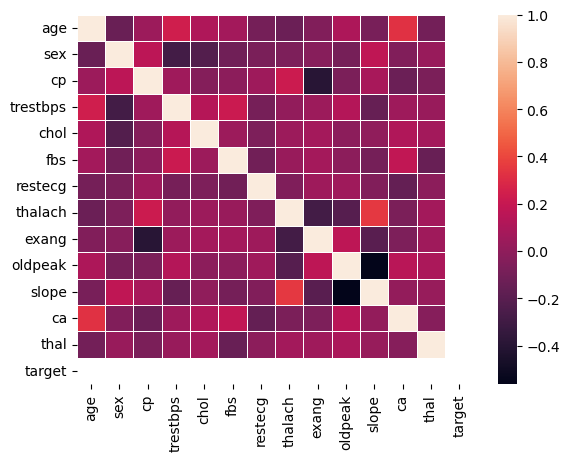

In [86]:
sns.heatmap(unhealthy.corr(),cbar=True,linewidth=0.5)                 #unhealthy
plt.show()

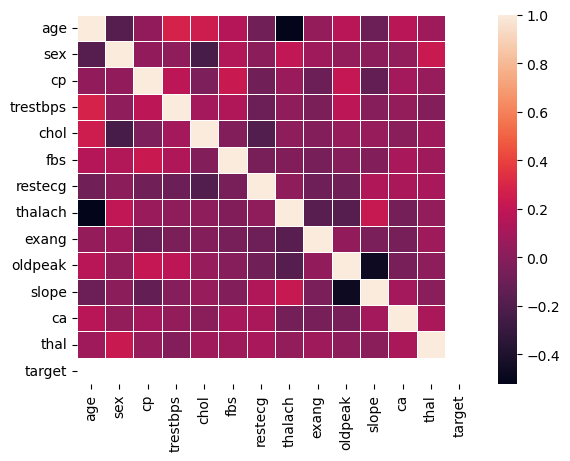

In [87]:
sns.heatmap(healthy.corr(),cbar=True,linewidth=0.5)               #healthy
plt.show()

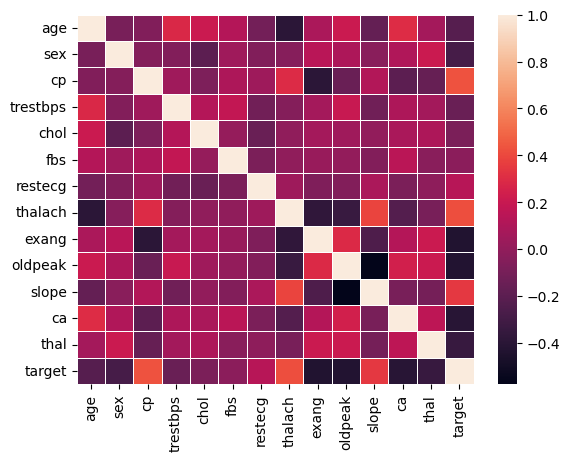

In [88]:
sns.heatmap(a.corr(),cbar=True,linewidth=0.5)               #data=a
plt.show()

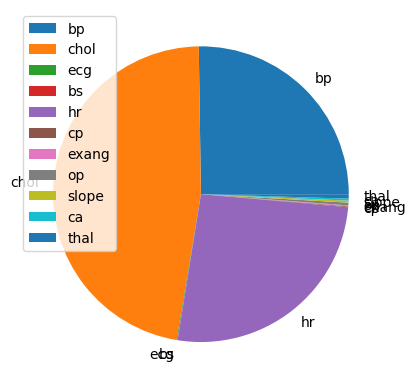

In [89]:
x=np.array([134.3985507246377,251.08695652173913,0.4492753623188406,0.15942028985507245,139.1014492753623,0.4782608695652174,0.5507246376811594,1.5855072463768116,1.1666666666666667,1.1666666666666667,2.5434782608695654])
y=["bp","chol","ecg","bs","hr","cp","exang","op","slope","ca","thal"]         #unhealthy
plt.pie(x,labels=y)
plt.legend()                                            
plt.show()

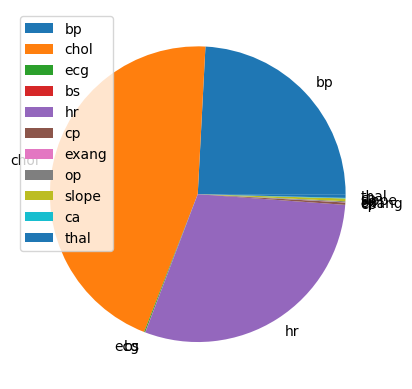

In [90]:
x=np.array([129.25,240.23076923076923,0.5914634146341463,0.1402439024390244,158.3780487804878,1.3719512195121952,0.1402439024390244,0.5865853658536585,1.5914634146341464,0.34146341463414637,2.1219512195121952])
y=["bp","chol","ecg","bs","hr","cp","exang","op","slope","ca","thal"]
plt.pie(x,labels=y)                                                                       #healthy
plt.legend()                                               
plt.show()

In [ ]:
# Comparing healthy & unhealthy : more chol - people with disease, more trestbps - people with disease but not much difference while comparing with healthy, more cp - people without disease

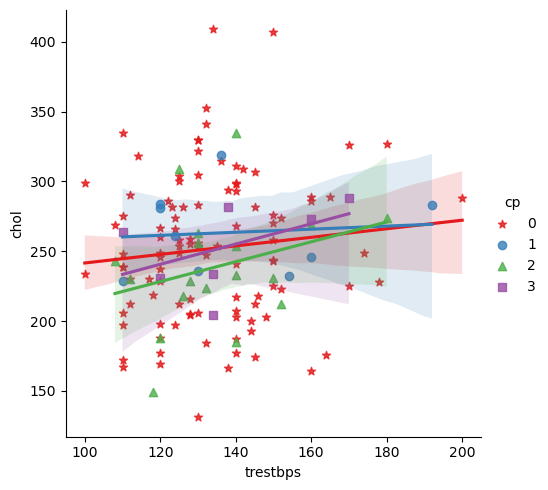

In [91]:
sns.lmplot(x="trestbps",y="chol",hue="cp",data=unhealthy,palette="Set1",markers=["*","o","^",","]) #normalbp-120,chol-200
plt.show()

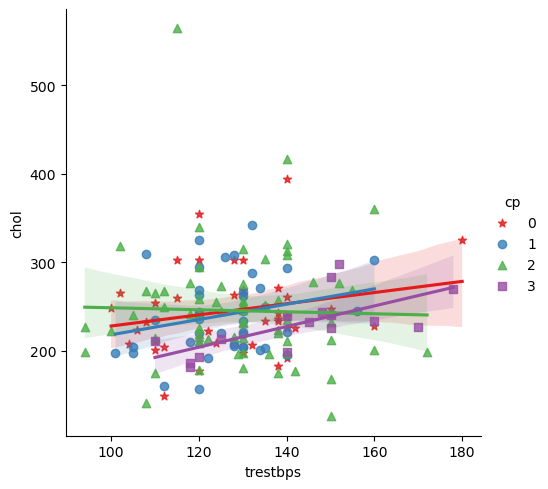

In [92]:
sns.lmplot(x="trestbps",y="chol",hue="cp",data=healthy,palette="Set1",markers=["*","o","^",","])
plt.show()

In [93]:
# Comparing healthy & unhealthy : more chol - people with disease, more trestbps - people with disease but not much difference while comparing with healthy, more fbs - people with disease

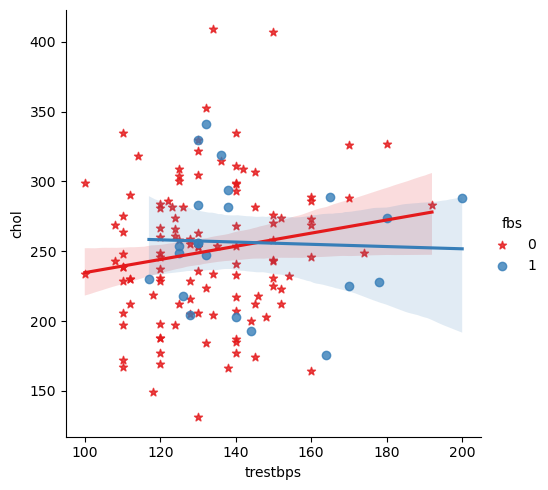

In [94]:
sns.lmplot(x="trestbps",y="chol",hue="fbs",data=unhealthy,palette="Set1",markers=["*","o"])
plt.show()

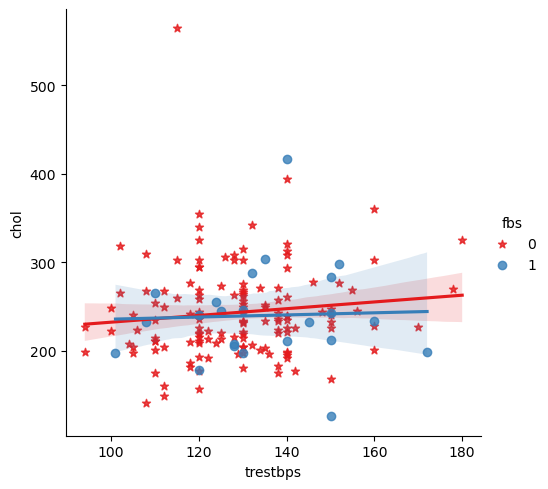

In [95]:
sns.lmplot(x="trestbps",y="chol",hue="fbs",data=healthy,palette="Set1",markers=["*","o"])
plt.show()

In [96]:
# Comparing healthy & unhealthy : more chol - people with disease, more trestbps - people with disease but not much difference while comparing with healthy, more restecg - people without disease

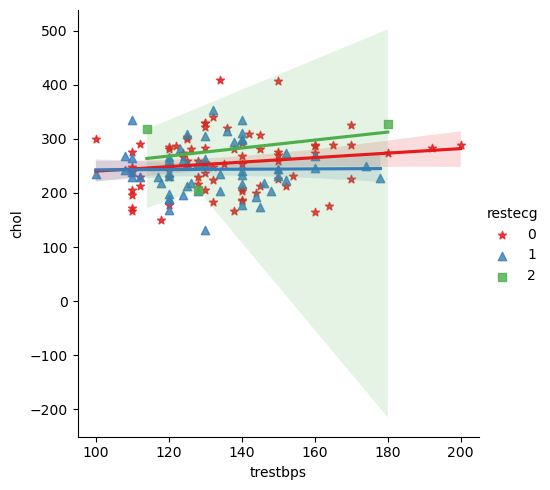

In [97]:
sns.lmplot(x="trestbps",y="chol",hue="restecg",data=unhealthy,palette="Set1",markers=["*","^",","])
plt.show()

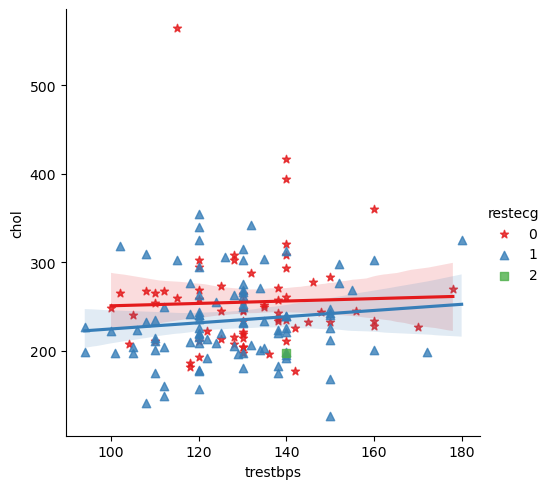

In [98]:
sns.lmplot(x="trestbps",y="chol",hue="restecg",data=healthy,palette="Set1",markers=["*","^",","])
plt.show()

In [99]:
# Comparing healthy & unhealthy : more chol - people with disease, more trestbps - people with disease but not much difference while comparing with healthy, more exang - people with disease

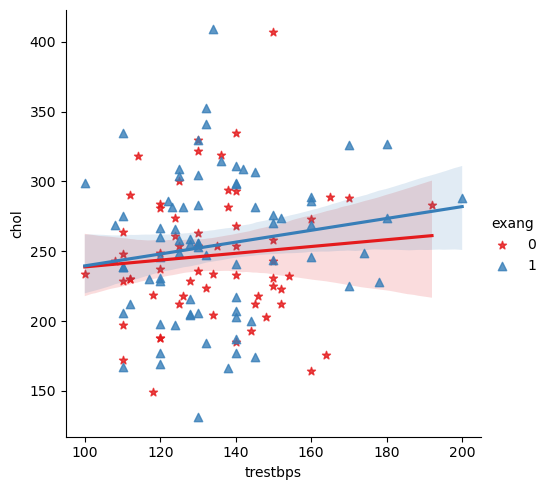

In [100]:
sns.lmplot(x="trestbps",y="chol",hue="exang",data=unhealthy,palette="Set1",markers=["*","^"])
plt.show()

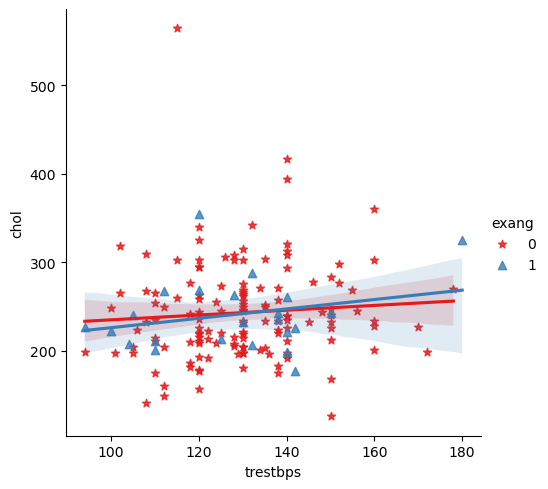

In [101]:
sns.lmplot(x="trestbps",y="chol",hue="exang",data=healthy,palette="Set1",markers=["*","^"])
plt.show()

In [102]:
# Comparing healthy & unhealthy : more chol - people with disease, more trestbps - people with disease but not much difference while comparing with healthy, more slope - people without disease

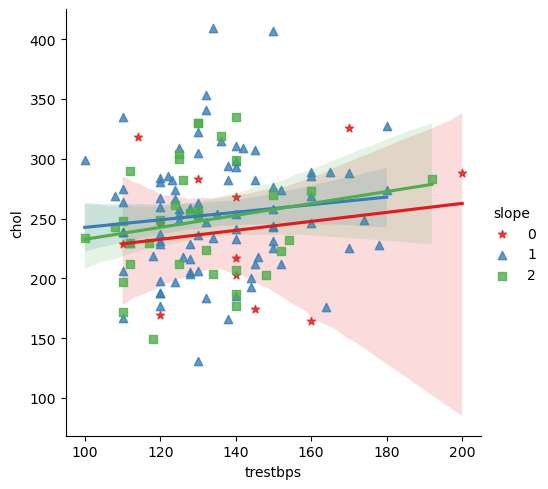

In [103]:
sns.lmplot(x="trestbps",y="chol",hue="slope",data=unhealthy,palette="Set1",markers=["*","^",","])
plt.show()

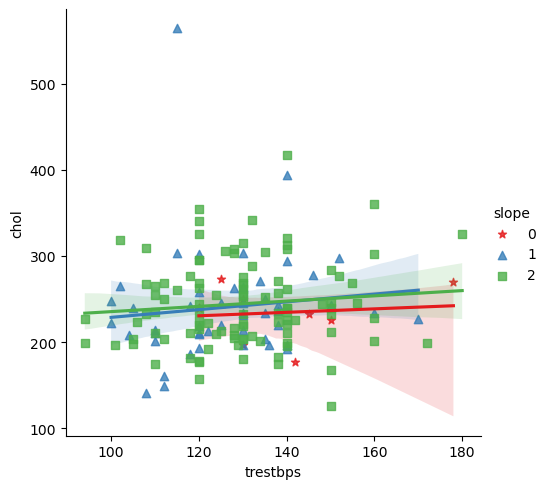

In [104]:
sns.lmplot(x="trestbps",y="chol",hue="slope",data=healthy,palette="Set1",markers=["*","^",","])
plt.show()

In [105]:
# Comparing healthy & unhealthy : more chol - people with disease, more trestbps - people with disease but not much difference while comparing with healthy, more ca - people with disease

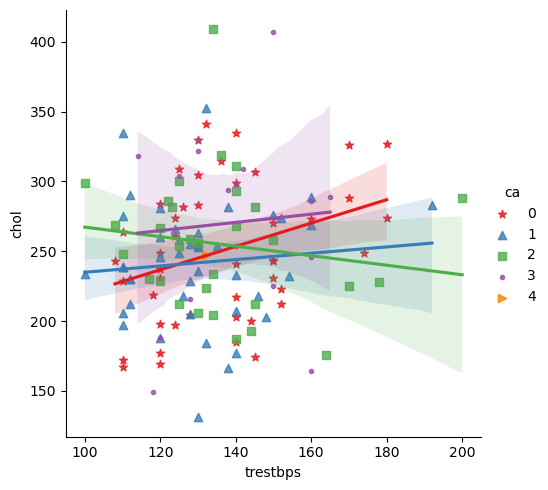

In [106]:
sns.lmplot(x="trestbps",y="chol",hue="ca",data=unhealthy,palette="Set1",markers=["*","^",",",".",">"])
plt.show()

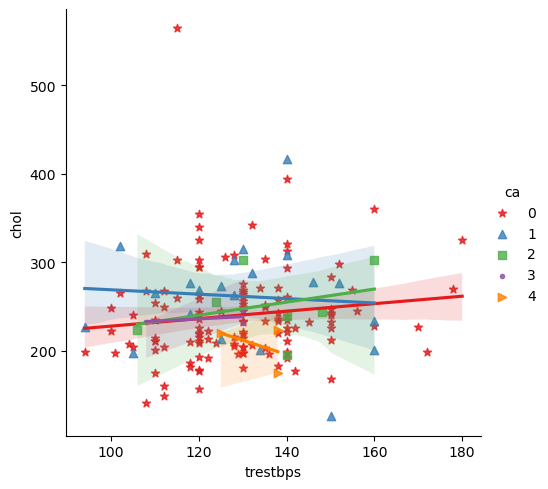

In [107]:
sns.lmplot(x="trestbps",y="chol",hue="ca",data=healthy,palette="Set1",markers=["*","^",",",".",">"])
plt.show()

In [108]:
# Comparing healthy & unhealthy : more chol - people with disease, more trestbps - people with disease but not much difference while comparing with healthy, more thal - people without disease

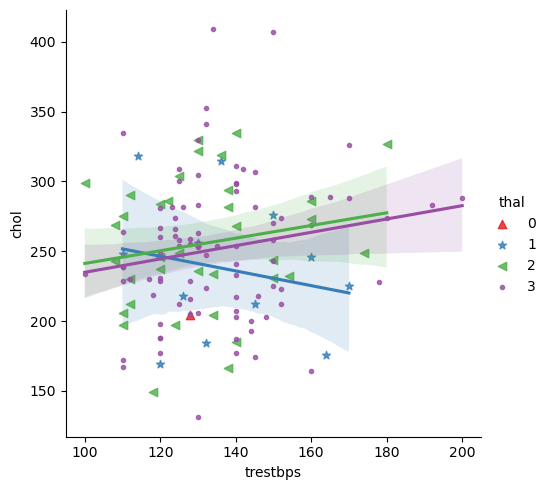

In [109]:
sns.lmplot(x="trestbps",y="chol",hue="thal",data=unhealthy,palette="Set1",markers=["^","*","<","."])
plt.show()

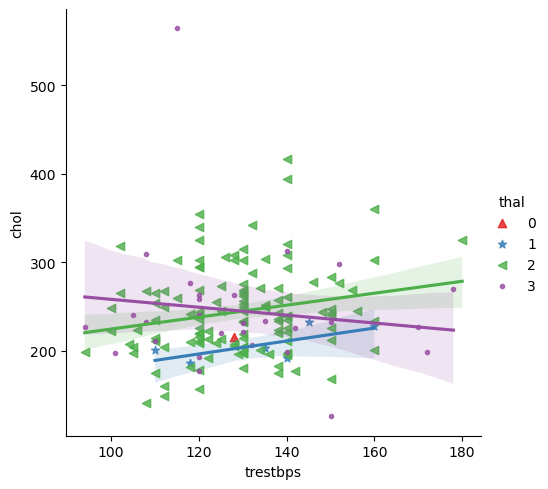

In [110]:
sns.lmplot(x="trestbps",y="chol",hue="thal",data=healthy,palette="Set1",markers=["^","*","<","."])
plt.show()

In [111]:
# Comparing healthy & unhealthy : more chol - people with disease, more thalach - people without disease, more cp - people without disease

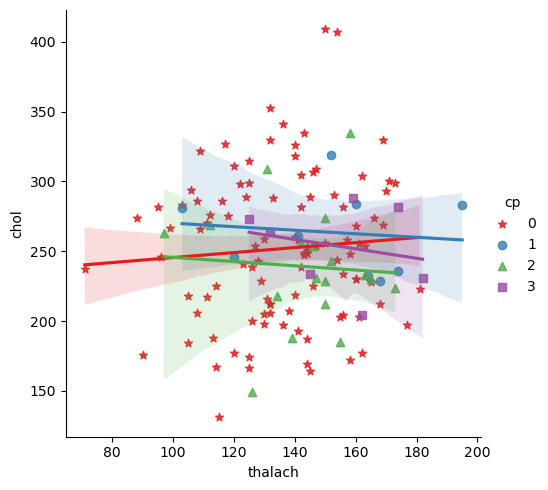

In [112]:
sns.lmplot(x="thalach",y="chol",hue="cp",data=unhealthy,palette="Set1",markers=["*","o","^",","])
plt.show()

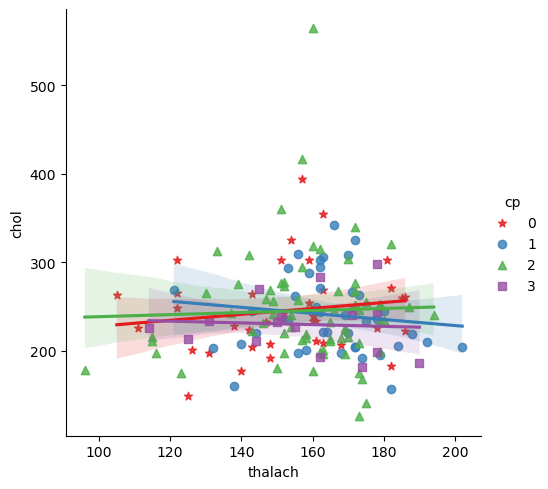

In [113]:
sns.lmplot(x="thalach",y="chol",hue="cp",data=healthy,palette="Set1",markers=["*","o","^",","])
plt.show()

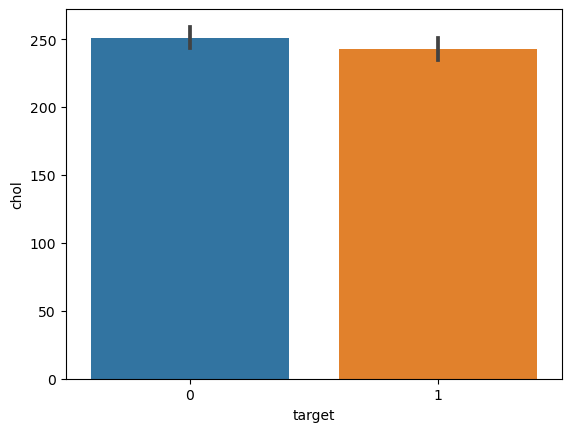

In [114]:
sns.barplot(x="target",y="chol",data=a)                              # more cholestrol - people with disease
plt.show()

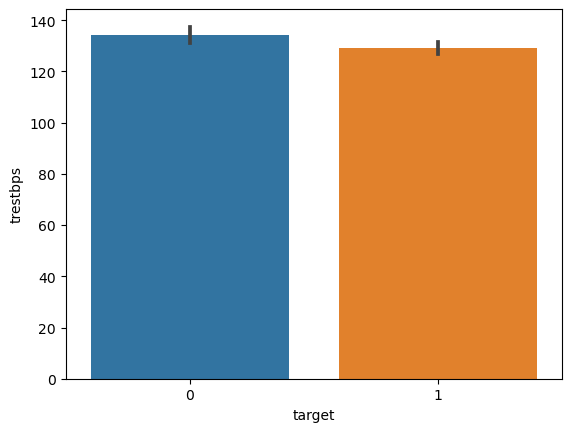

In [115]:
sns.barplot(x="target",y="trestbps",data=a)                             # more trestbps - people with disease
plt.show()

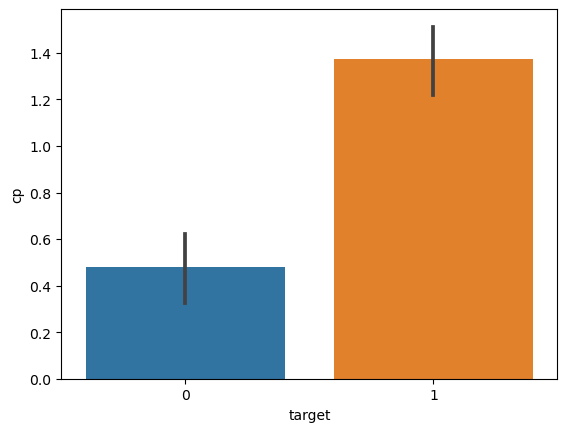

In [116]:
sns.barplot(x="target",y="cp",data=a)                        # more cp - people without disease
plt.show()

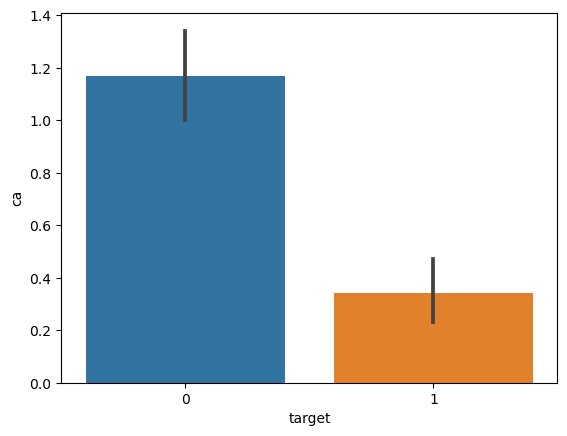

In [117]:
sns.barplot(x="target",y="ca",data=a)                                # more ca - people with disease
plt.show()

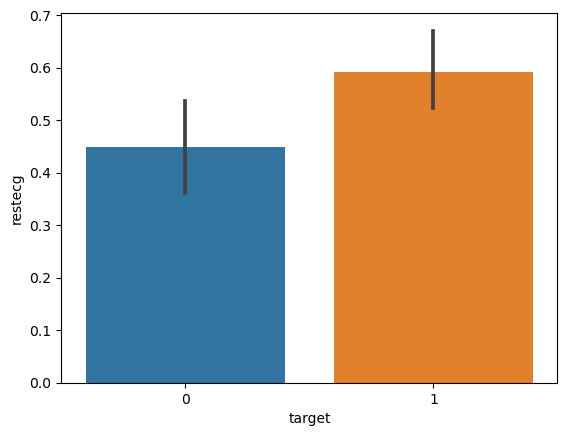

In [118]:
sns.barplot(x="target",y="restecg",data=a)                           # more restecg - people without disease
plt.show()

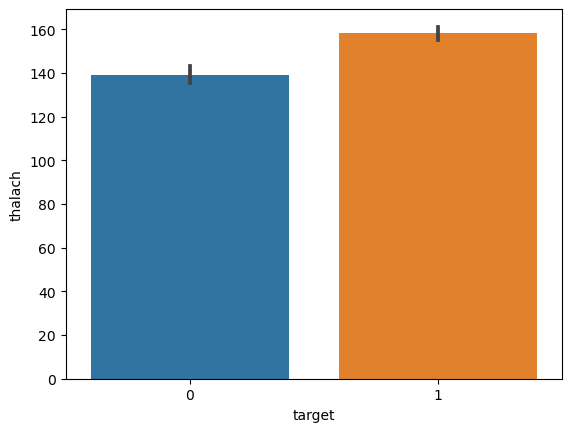

In [119]:
sns.barplot(x="target",y="thalach",data=a)                        # more thalach - people without disease
plt.show()

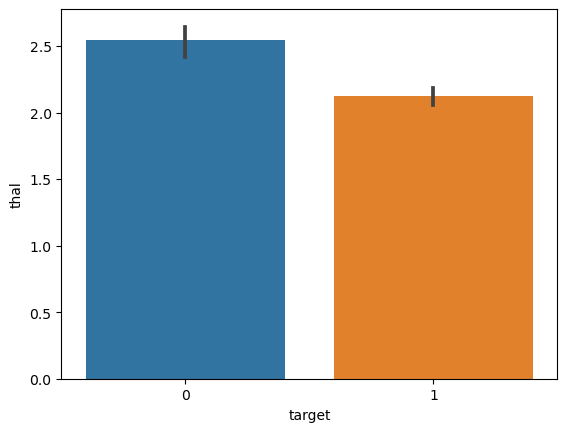

In [120]:
sns.barplot(x="target",y="thal",data=a)                        # more thal - people with disease
plt.show()

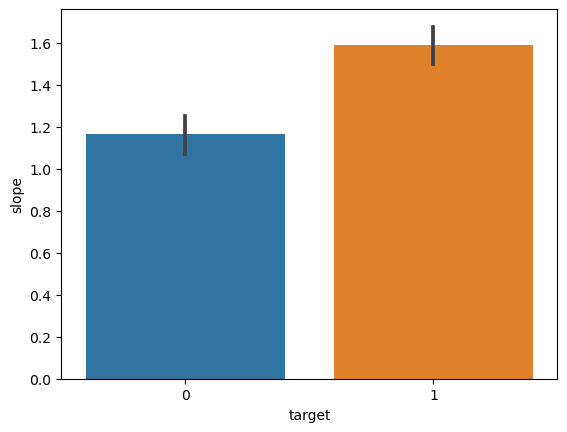

In [121]:
sns.barplot(x="target",y="slope",data=a)                           # more slope - people without disease
plt.show()

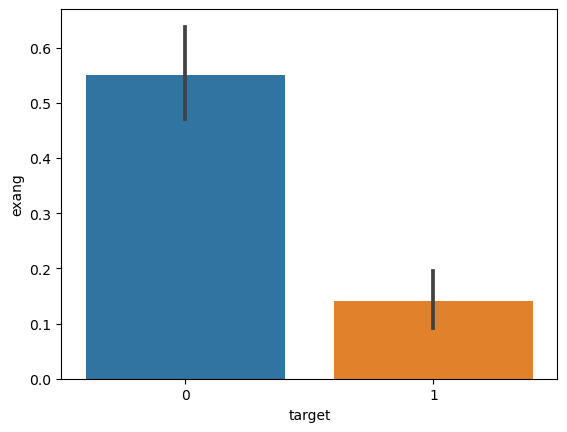

In [122]:
sns.barplot(x="target",y="exang",data=a)                                 # more exang - people with disease
plt.show()

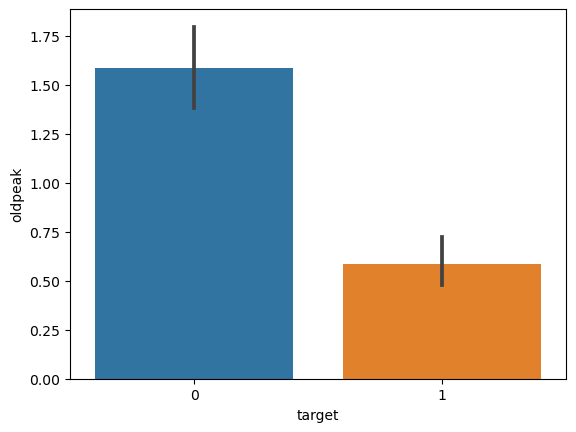

In [123]:
sns.barplot(x="target",y="oldpeak",data=a)                             # more oldpeak - people with disease
plt.show()

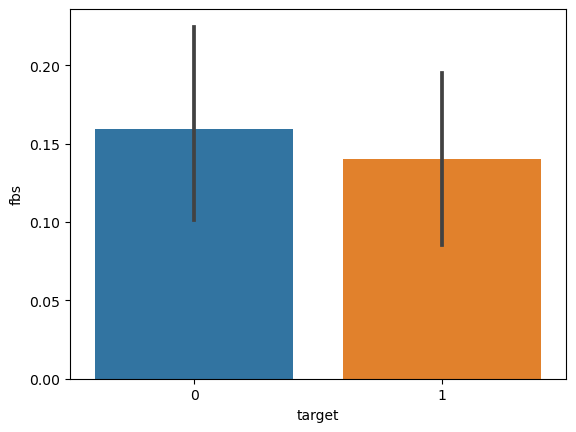

In [124]:
sns.barplot(x="target",y="fbs",data=a)                                     # more fbs - people with disease
plt.show()

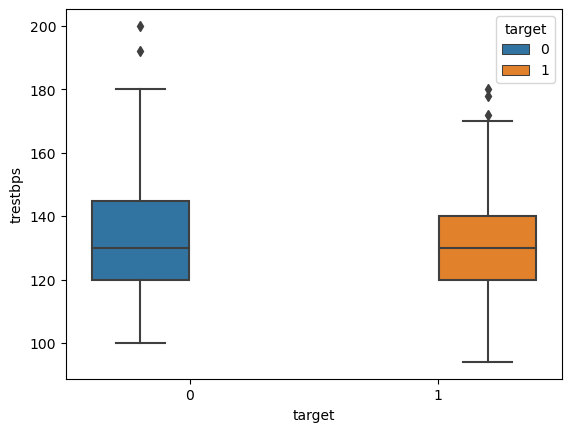

In [125]:
sns.boxplot(x="target",y="trestbps",hue="target",data=a)                 # more trestbps -  with disease
plt.show()

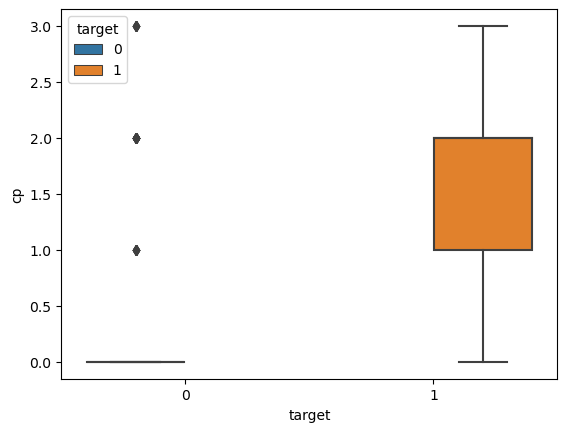

In [126]:
sns.boxplot(x="target",y="cp",hue="target",data=a)                           # more cp -  without disease
plt.show()

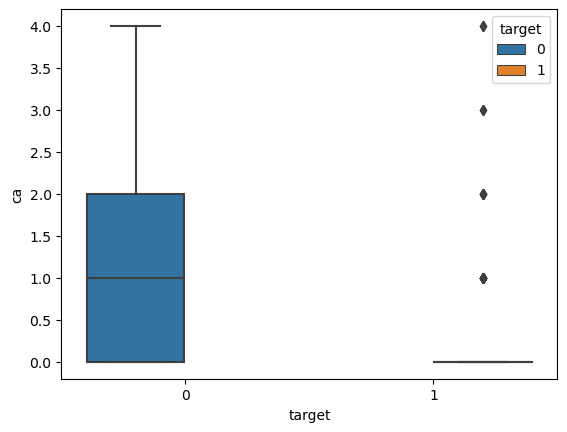

In [127]:
sns.boxplot(x="target",y="ca",hue="target",data=a)                             # more ca -  with disease
plt.show()

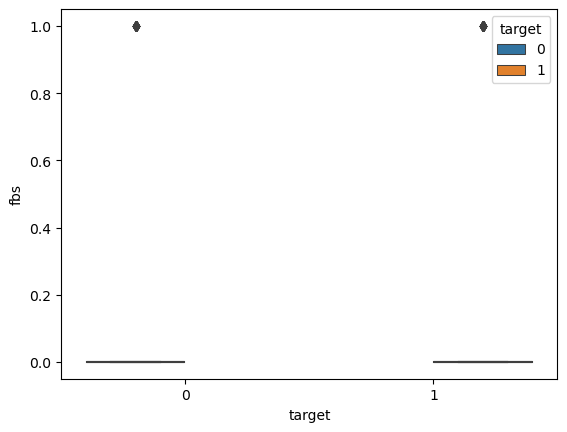

In [128]:
sns.boxplot(x="target",y="fbs",hue="target",data=a)                       # more fbs - with disease( not much difference)
plt.show()

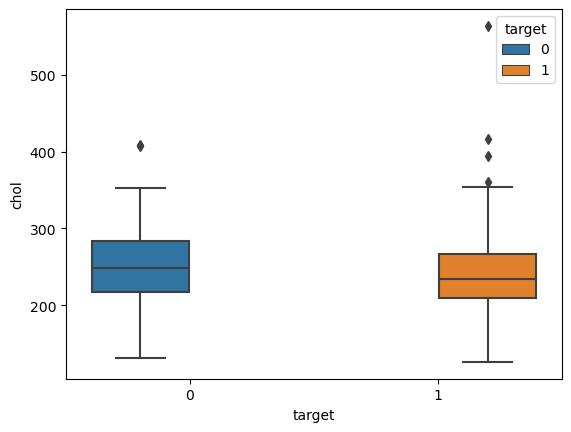

In [129]:
sns.boxplot(x="target",y="chol",hue="target",data=a)                       #more chol - with disease 
plt.show()

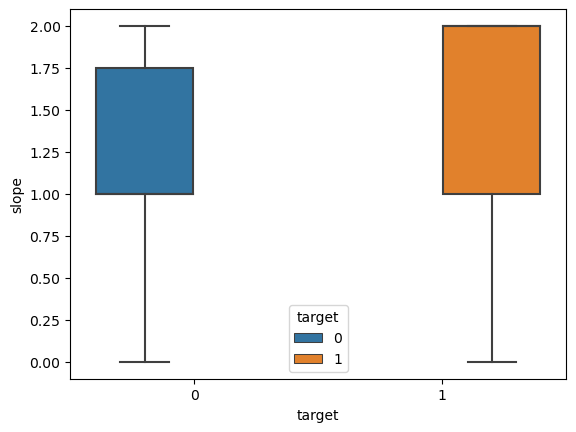

In [130]:
sns.boxplot(x="target",y="slope",hue="target",data=a)                            # more slope -  without disease
plt.show()

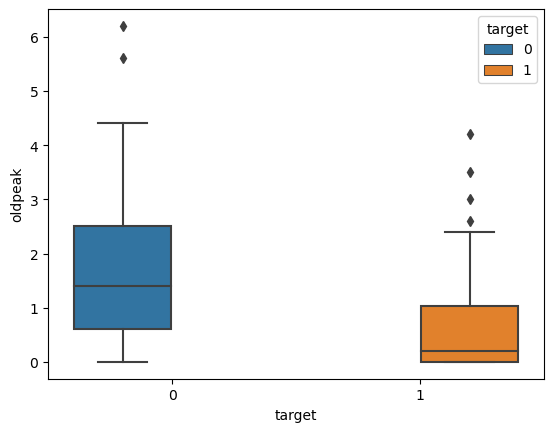

In [131]:
sns.boxplot(x="target",y="oldpeak",hue="target",data=a)                  # more oldpeak -  with disease
plt.show()

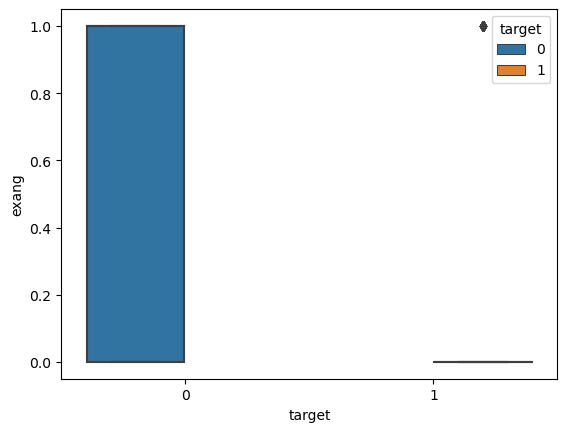

In [132]:
sns.boxplot(x="target",y="exang",hue="target",data=a)                     # more exang -  with disease
plt.show()

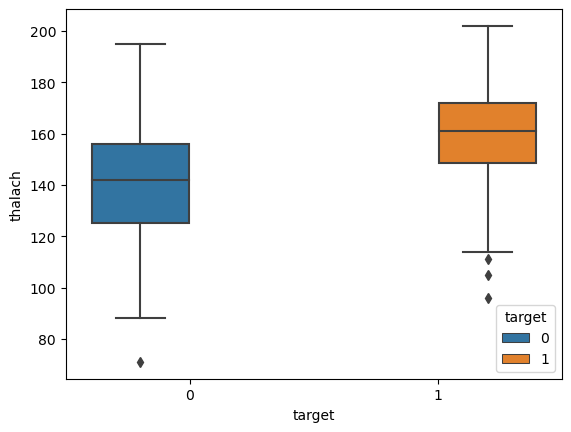

In [133]:
sns.boxplot(x="target",y="thalach",hue="target",data=a)              # more thalach -  without disease
plt.show()

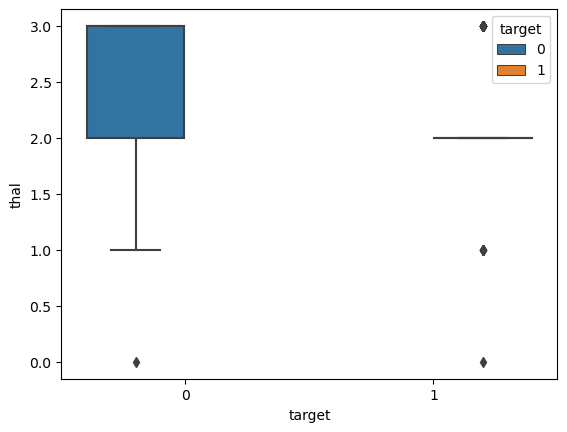

In [134]:
sns.boxplot(x="target",y="thal",hue="target",data=a)                      # more thal -  with disease
plt.show()

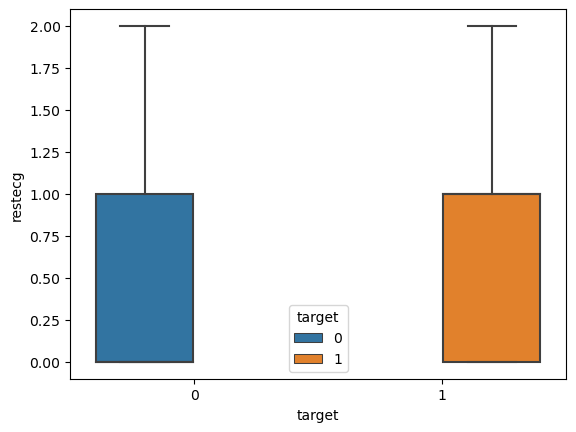

In [135]:
sns.boxplot(x="target",y="restecg",hue="target",data=a)                    #  restecg - comparitively same
plt.show()

In [136]:
#cp,thalach,restecg,slope-not a factor

In [11]:
x=a.iloc[:,:-1].values
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [52.,  1.,  0., ...,  2.,  1.,  3.],
       [59.,  1.,  3., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [12]:
y=a.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [82]:
a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=13,random_state=92)

In [15]:
x_train

array([[61.,  1.,  3., ...,  1.,  2.,  2.],
       [70.,  1.,  1., ...,  2.,  0.,  2.],
       [51.,  1.,  0., ...,  2.,  0.,  3.],
       ...,
       [58.,  1.,  2., ...,  2.,  0.,  2.],
       [42.,  1.,  0., ...,  2.,  0.,  2.],
       [52.,  1.,  3., ...,  1.,  0.,  3.]])

In [16]:
x_test

array([[ 51. ,   0. ,   0. , 130. , 305. ,   0. ,   1. , 142. ,   1. ,
          1.2,   1. ,   0. ,   3. ],
       [ 54. ,   0. ,   2. , 160. , 201. ,   0. ,   1. , 163. ,   0. ,
          0. ,   2. ,   1. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ],
       [ 52. ,   1. ,   3. , 118. , 186. ,   0. ,   0. , 190. ,   0. ,
          0. ,   1. ,   0. ,   1. ],
       [ 51. ,   1. ,   2. ,  94. , 227. ,   0. ,   1. , 154. ,   1. ,
          0. ,   2. ,   1. ,   3. ],
       [ 51. ,   0. ,   2. , 130. , 256. ,   0. ,   0. , 149. ,   0. ,
          0.5,   2. ,   0. ,   2. ],
       [ 69. ,   1. ,   2. , 140. , 254. ,   0. ,   0. , 146. ,   0. ,
          2. ,   1. ,   3. ,   3. ],
       [ 50. ,   1. ,   2. , 129. , 196. ,   0. ,   1. , 163. ,   0. ,
          0. ,   2. ,   0. ,   2. ],
       [ 62. ,   1. ,   0. , 120. , 267. ,   0. ,   1. ,  99. ,   1. ,
          1.8,   1. ,   2. ,   3. ],
       [ 63. ,   0. ,   1. ,

In [17]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [18]:
y_test

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()
regressor

LinearRegression()

In [21]:
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
Score1=regressor.score(x_train,y_train)
Score1

0.5075511116439924

In [23]:
trainingscore1=regressor.score(x_train,y_train)
trainingscore1

0.5075511116439924

In [24]:
testingscore1=regressor.score(x_test,y_test)
testingscore1

0.7525334253319992

In [53]:
from sklearn.linear_model import LogisticRegression                       # logistic Regression

In [54]:
logisticregressor=LogisticRegression()

In [55]:
logisticregressor.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
xpred=logisticregressor.predict(x_train)
xpred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [57]:
ypred=logisticregressor.predict(x_test)
ypred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [58]:
Score2=logisticregressor.score(x_train,y_train)
Score2

0.8477508650519031

In [59]:
trainingscore2=logisticregressor.score(x_train,y_train)
trainingscore2

0.8477508650519031

In [60]:
testingscore2=logisticregressor.score(x_test,y_test)
testingscore2

1.0

In [61]:
age=int(input("Enter age:"))
sex=int(input("Enter sex: "))
cp=int(input("Enter cp: "))
trestbps=int(input("Enter trestbps: "))
chol=int(input("Enter chol: "))
fbs=int(input("Enter fbs: "))
restecg=int(input("Enter restecg: "))
thalach=int(input("Enter thalach: "))
exang=int(input("Enter exang: "))
oldpeak=int(input("Enter oldpeak: "))
slope=int(input("Enter slope: "))
ca=int(input("Enter ca: "))
thal=int(input("Enter thal: "))
New=[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]     # creating a variable including all the above input variables
numpy=np.asarray(New)                                           # converting into numpy array
Newarray=numpy.reshape(1,-1)
pred=regressor.predict(Newarray)
d=float(pred)
print("target",pred)



Enter age:53
Enter sex: 1
Enter cp: 0
Enter trestbps: 140
Enter chol: 203
Enter fbs: 1
Enter restecg: 0
Enter thalach: 155
Enter exang: 1
Enter oldpeak: 3
Enter slope: 0
Enter ca: 0
Enter thal: 3
target [0.06743725]


In [76]:
'''Enter age:53
Enter sex: 1
Enter cp: 0
Enter trestbps: 140
Enter chol: 203
Enter fbs: 1
Enter restecg: 0
Enter thalach: 155
Enter exang: 1
Enter oldpeak: 3
Enter slope: 0
Enter ca: 0
Enter thal: 3
Profit [[0.06743725]]'''

'Enter age:53\nEnter sex: 1\nEnter cp: 0\nEnter trestbps: 140\nEnter chol: 203\nEnter fbs: 1\nEnter restecg: 0\nEnter thalach: 155\nEnter exang: 1\nEnter oldpeak: 3\nEnter slope: 0\nEnter ca: 0\nEnter thal: 3\nProfit [[0.06743725]]'

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
trainingaccuracy=accuracy_score(xpred,y_train)
trainingaccuracy

0.8477508650519031

In [64]:
trainingaccuracy=accuracy_score(ypred,y_test)
trainingaccuracy

1.0

In [65]:
from sklearn.svm import SVR

In [66]:
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [67]:
xpred=svr.predict(x_train)
xpred

array([ 0.66922535,  0.79369773,  0.38532725,  0.03133183,  0.59321198,
        0.74675761,  0.84972062,  0.84180809,  0.06891605,  0.89101809,
        0.95412073,  0.21093893,  0.61557669,  0.09833702, -0.28198246,
        0.03633016,  1.18909869,  0.69737416,  0.93300047,  1.03681301,
        0.55768902,  1.06114742,  0.19349037,  0.70259266,  0.68170084,
        0.88281419,  1.17224941,  0.66512031,  0.86546926,  0.66456585,
        0.00712733,  0.10322354,  0.58471282,  0.33136005,  1.01480579,
        0.42610298,  1.11308805,  0.68573043,  0.98561362,  0.30726721,
        0.23689198,  0.89194945,  0.71285041,  0.94848779,  0.04332169,
        0.25269043,  0.68248168,  0.17680056,  0.91579039,  0.6110529 ,
        0.14852634,  1.03552297,  0.73616782,  0.50078617,  0.96659026,
        1.09244288,  0.79042427,  0.78736607,  0.15950832,  0.30547531,
        0.89260413, -0.11196798,  0.91882613,  0.64852766,  0.32187167,
        0.07420361, -0.14195423,  0.8298816 ,  0.3618974 ,  0.91

In [68]:
ypred=svr.predict(x_test)
ypred

array([ 0.34849421,  0.98833881,  0.64433505,  1.33625844,  0.60376559,
        1.06649793,  0.29200593,  1.06027262, -0.18945744,  0.80982255,
        0.8825719 ,  0.15294562,  0.84777587])

In [69]:
Score3=svr.score(x_train,y_train)
Score3

0.47436433678193646

In [70]:
trainingscore3=svr.score(x_train,y_train)
trainingscore3

0.47436433678193646

In [71]:
testingscore3=svr.score(x_test,y_test)
testingscore3

0.7313727217752439

In [72]:
from sklearn.svm import SVC

In [73]:
classifier=SVC(kernel="linear")
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [74]:
xpred=classifier.predict(x_train)
xpred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [75]:
ypred=classifier.predict(x_test)
ypred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [76]:
trainingscore3=classifier.score(x_train,y_train)
trainingscore3

0.8615916955017301

In [77]:
testingscore3=classifier.score(x_test,y_test)
testingscore3

1.0

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
cm=confusion_matrix(y_test,ypred)
cm

array([[4, 0],
       [0, 9]], dtype=int64)

In [80]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred}
new1=pd.DataFrame(data)
new1

,actual,predict,correct
0,0,0,True
1,1,1,True
2,1,1,True
3,1,1,True
4,1,1,True
5,1,1,True
6,0,0,True
7,1,1,True
8,0,0,True
9,1,1,True


In [81]:
Score4=classifier.score(x_train,y_train)
Score4

0.8615916955017301

In [82]:
trainingscore4=classifier.score(x_train,y_train)
trainingscore4

0.8615916955017301

In [83]:
testingscore4=classifier.score(x_test,y_test)
testingscore4

1.0

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
classifier1=DecisionTreeClassifier(criterion="entropy",random_state=0)

In [86]:
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [87]:
xpred=classifier1.predict(x_train)
xpred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [88]:
ypred=classifier1.predict(x_test)
ypred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [89]:
Score5=classifier1.score(x_train,y_train)
Score5

1.0

In [90]:
trainingscore5=classifier1.score(x_train,y_train)
trainingscore5

1.0

In [91]:
testingscore5=classifier1.score(x_test,y_test)
testingscore5

0.7692307692307693

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
cm=confusion_matrix(y_test,ypred)
cm

array([[3, 1],
       [2, 7]], dtype=int64)

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rfc=RandomForestClassifier(random_state=100)
rfc

RandomForestClassifier(random_state=100)

In [96]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [97]:
xpred=rfc.predict(x_train)
xpred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [98]:
ypred=rfc.predict(x_test)
ypred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [99]:
trainingscore6=rfc.score(x_train,y_train)
trainingscore6

1.0

In [100]:
testingscore6=rfc.score(x_test,y_test)
testingscore6

0.9230769230769231

In [101]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred}
new1=pd.DataFrame(data)
new1

,actual,predict,correct
0,0,0,True
1,1,1,True
2,1,1,True
3,1,1,True
4,1,1,True
5,1,1,True
6,0,0,True
7,1,1,True
8,0,0,True
9,1,1,True


In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dtr=DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [104]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [105]:
xpred=dtr.predict(x_train)
xpred

array([0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0.

In [106]:
ypred=dtr.predict(x_test)
ypred

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.])

In [107]:
trainingscore7=dtr.score(x_train,y_train)
trainingscore7

1.0

In [108]:
testingscore7=dtr.score(x_test,y_test)
testingscore7

-0.4444444444444444

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
RFR=RandomForestRegressor()
RFR

RandomForestRegressor()

In [111]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
xpred=RFR.predict(x_train)
xpred

array([0.19, 0.84, 0.16, 0.58, 0.77, 0.96, 0.31, 0.81, 0.  , 0.31, 0.99,
       0.09, 0.91, 0.04, 0.01, 0.09, 0.9 , 0.83, 0.93, 0.97, 0.11, 0.9 ,
       0.  , 0.92, 0.32, 0.31, 1.  , 0.24, 0.87, 0.95, 0.  , 0.03, 0.84,
       0.03, 0.88, 0.16, 1.  , 0.93, 0.99, 0.76, 0.62, 0.97, 0.95, 0.94,
       0.05, 0.01, 0.91, 0.04, 0.95, 0.86, 0.  , 0.99, 0.33, 0.89, 0.97,
       1.  , 0.92, 0.21, 0.02, 0.01, 0.98, 0.  , 0.88, 0.87, 0.06, 0.  ,
       0.  , 0.94, 0.14, 0.94, 0.98, 0.85, 0.89, 0.22, 1.  , 1.  , 0.96,
       1.  , 0.16, 0.02, 0.19, 0.31, 0.91, 0.03, 0.66, 0.01, 0.86, 0.16,
       0.1 , 0.97, 0.22, 0.91, 0.99, 0.1 , 0.25, 0.28, 0.96, 0.08, 0.89,
       0.04, 1.  , 0.75, 0.33, 0.25, 0.92, 0.96, 0.99, 0.34, 0.99, 0.89,
       0.73, 0.  , 0.84, 1.  , 0.97, 0.04, 0.05, 0.01, 0.08, 0.83, 0.17,
       0.95, 0.94, 0.9 , 0.05, 0.02, 0.01, 0.78, 0.98, 0.01, 0.23, 0.33,
       0.85, 0.  , 0.99, 0.13, 0.75, 1.  , 0.84, 0.97, 0.98, 0.92, 0.93,
       0.96, 1.  , 0.06, 0.88, 0.99, 0.15, 0.91, 0.

In [113]:
ypred=RFR.predict(x_test)
ypred

array([0.02, 0.8 , 0.52, 0.94, 0.68, 0.97, 0.58, 0.99, 0.03, 0.56, 0.38,
       0.33, 0.99])

In [114]:
trainingscore8=RFR.score(x_train,y_train)
trainingscore8

0.9233363842079922

In [115]:
testingscore8=RFR.score(x_test,y_test)
testingscore8

0.49368611111111116

In [116]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns

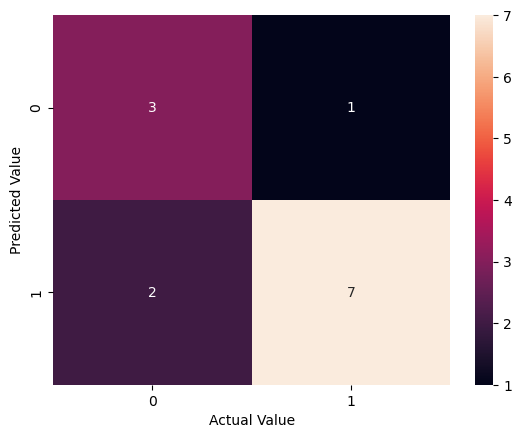

In [117]:
sns.heatmap(cm,annot=True)                               # cm - variable of confusion matrix
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [122]:
z=pd.DataFrame({"ML Models":["L Reg","SVR","Log Reg","SVC","DT Class","RF Class","DT Reg","RF Reg"],
               "Accuracy Score":[testingscore1,testingscore2,testingscore3,testingscore4,testingscore5,testingscore6,testingscore7,testingscore8]})
z

,ML Models,Accuracy Score
0,L Reg,0.752533
1,SVR,1.000000
2,Log Reg,1.000000
3,SVC,1.000000
4,DT Class,0.769231
5,RF Class,0.923077
6,DT Reg,-0.444444
7,RF Reg,0.493686


,ML Models,Accuracy Score
1,SVR,1.000000
2,Log Reg,1.000000
3,SVC,1.000000
5,RF Class,0.923077
4,DT Class,0.769231
0,L Reg,0.752533
7,RF Reg,0.493686
6,DT Reg,-0.444444


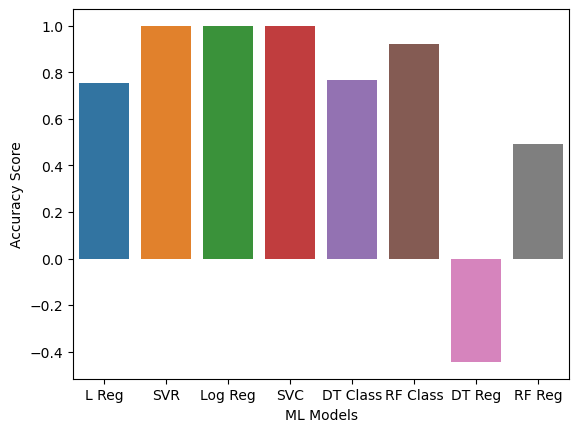

In [123]:
sns.barplot(x="ML Models",y="Accuracy Score",data=z)
z.sort_values(by="Accuracy Score",ascending=False)

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
gauss=GaussianNB()
gauss

GaussianNB()

In [126]:
gauss.fit(x_train,y_train)

GaussianNB()

In [127]:
xpred=gauss.predict(x_train)
xpred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [128]:
ypred=gauss.predict(x_test)
ypred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [129]:
trainingscore3=gauss.score(x_train,y_train)
trainingscore3

0.8408304498269896

In [130]:
testingscore3=gauss.score(x_test,y_test)
testingscore3

0.9230769230769231

In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
cm=confusion_matrix(y_test,ypred)
cm

array([[4, 0],
       [1, 8]], dtype=int64)

In [133]:
data={"actual":y_test,
      "predict":ypred,
       "correct":y_test==ypred}
new1=pd.DataFrame(data)
new1

,actual,predict,correct
0,0,0,True
1,1,1,True
2,1,1,True
3,1,1,True
4,1,0,False
5,1,1,True
6,0,0,True
7,1,1,True
8,0,0,True
9,1,1,True


In [134]:
from sklearn import metrics

In [135]:
print("mae"),metrics.mean_absolute_error(y_test,ypred)

mae


(None, 0.07692307692307693)

In [136]:
print("mse"),metrics.mean_squared_error(y_test,ypred)

mse


(None, 0.07692307692307693)

In [137]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred))

rmse


(None, 0.2773500981126146)

In [138]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred))

rmae


(None, 0.2773500981126146)

In [139]:
from sklearn.metrics import r2_score

In [140]:
r=r2_score(y_test,ypred)
r

0.6388888888888888